<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 1

### Building "Pokemon Stay"

---
You are an analyst at a "scrappy" online gaming company that specializes in remakes of last year's fads.

Your boss, who runs the product development team, is convinced that Pokemon Go's fatal flaw was that you had to actually move around outside. She has design mock-ups for a new game called Pokemon Stay: in this version players still need to move, but just from website to website. Pokemon gyms are now popular online destinations, and catching Pokemon in the "wild" simply requires browsing the internet for hours in the comfort of your home.

She wants you to program a prototype version of the game, and analyze the planned content to help the team calibrate the design.

#### Package imports

The pprint package below is the only package imported here, and it's not even strictly required to do any of the project. Printing python variables and objects with pprint can help to format them in a "prettier" way.

In [1]:
from pprint import pprint

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Defining a player

---

The player variables are:

    player_id : id code unique to each player (integer)
    player_name : entered name of the player (string)
    time_played : number of time played the game in minutes (float)
    player_pokemon: the player's captured pokemon (dictionary)
    gyms_visited: ids of the gyms that a player has visited (list)
    
Create the components for a player object by defining each of these variables. The dictionary and list variables should just be defined as empty; you can use any (correctly typed) values for the others.

In [2]:
class Player(object):
    def __init__(self, player_id = 1, player_name = "Player Number1", time_played = 0.0,
                 player_pokemon = None, gyms_visited = None):
        self.player_id = player_id
        self.player_name = player_name
        self.time_played = time_played
        if player_pokemon is None:
            player_pokemon = dict()
        self.player_pokemon = player_pokemon
        if gyms_visited is None:
            gyms_visited = list()
        self.gyms_visited = gyms_visited
        
player_1 = Player()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Defining "gym" locations

---

As the sole programmer, Pokemon Stay will have to start small. To begin, there will be 10 different gym location websites on the internet. The gym locations are:

    1. 'reddit.com'
    2. 'amazon.com'
    3. 'twitter.com'
    4. 'linkedin.com'
    5. 'ebay.com'
    6. 'netflix.com'
    7. 'amazon.com'
    8. 'stackoverflow.com'
    9. 'github.com'
    10. 'quora.com'

1. Set up a list of all the gym locations. This will be a list of strings.
2. Append two of these locations to your player's list of visited gyms.
3. Print the list.

In [3]:
gym_locs = ['reddit.com',
            'amazon.com',
            'twitter.com',
            'linkedin.com',
            'ebay.com',
            'netflix.com',
            'amazon.com',
            'stackoverflow.com',
            'github.com',
            'quora.com']
player_1.gyms_visited.extend([gym_locs[0], gym_locs[1]])
print(player_1.player_name, "has visited these locations:\n", player_1.gyms_visited)

Player Number1 has visited these locations:
 ['reddit.com', 'amazon.com']


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Create a pokedex

---

We also need to create some pokemon to catch. Each pokemon will be defined by these variables:

    pokemon_id : unique identifier for each pokemon (integer)
    name : the name of the pokemon (string)
    type : the category of pokemon (string)
    hp : base hitpoints (integer)
    attack : base attack (integer)
    defense : base defense (integer)
    special_attack : base special attack (integer)
    special_defense : base sepecial defense (integer)
    speed : base speed (integer)

We are only going to create 3 different pokemon with these `pokemon_id` and `pokemon_name` values:

    1 : 'charmander'
    2 : 'squirtle'
    3 : 'bulbasaur'

Create a dictionary that will contain the pokemon. The keys of the dictionary will be the `pokemon_id` and the values will themselves dictionaries that contain the other pokemon variables. The structure of the pokedex dictionary will start like so:
     
     {
         1: {
                 'name':'charmander',
                 'type':'fire',
                 ...
                 
The `type` of charmander, squirtle, and bulbasaur should be `'fire'`, `'water'`, and `'poison'` respectively. The other values are up to you, make them anything you like!

Print (or pretty print) the pokedex dictionary with the 3 pokemon.

In [4]:
import numpy as np
import csv

#reading the data from a sample csv file
data_rows = []
with open('pokemon_attributes.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        data_rows.append(row)
f.close()
#creating a table of the attributes of Pokemon and their values
pokemon_data = data_rows

#a general program to read the data from a table, with any number of cells, and create the desired configuration out of it 
header = pokemon_data[0][1:]
num_attributes = len(header)
num_pokemons = len(pokemon_data)-1
pokemon_list = list()
for i in range(1, num_pokemons+1):
    data_pokemon_attributes = list()
    pokemon_dict_nested = {}
    data_pokemon_attributes = pokemon_data[i][1:]
    pokemon_dict_nested = {column_name:data_pokemon_attributes[index] for index, column_name in enumerate(header)}
    pokemon_list.append(pokemon_dict_nested)
pokedex = {(j+1):pokemon_list[j] for j in range(0, num_pokemons)}

pprint(pokedex)

{1: {'attack': '160',
     'defense': '200',
     'hp': '70',
     'name': 'charmander',
     'special_attack': '50',
     'special_defense': '90',
     'speed': '60',
     'type': 'fire'},
 2: {'attack': '125',
     'defense': '220',
     'hp': '80',
     'name': 'squirtle',
     'special_attack': '55',
     'special_defense': '105',
     'speed': '35',
     'type': 'water'},
 3: {'attack': '140',
     'defense': '190',
     'hp': '75',
     'name': 'bulbasaur',
     'special_attack': '70',
     'special_defense': '95',
     'speed': '55',
     'type': 'poison'}}


In [2]:
#This is another way to create the desired configuration

import pandas as pd
pokedex_df  = pd.read_csv('pokemon_attributes.csv')
pokedex_df = pokedex_df.set_index('id')
pokedex_df_dict = pokedex_df.T.to_dict(orient='dict')
pprint(pokedex_df_dict)
pokedex_df.head()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Create a data structure for players

---

### 4.1 

In order to maintain a database of multiple players, create a dictionary that keeps track of players indexed by `player_id`. 

The keys of the dictionary will be `player_id` and values will be dictionaries containing each player's variables (from question 1). 

Construct the `players` dictionary and insert the player that you defined in question 1, then print `players`.

In [6]:
def variables_to_dictionary(p):
    return {'player_name':p.player_name, 'time_played':p.time_played,
            'player_pokemon':p.player_pokemon, 'gyms_visited':p.gyms_visited}

def player_details_to_dictionary(p):
    players_dictionary = {p.player_id:variables_to_dictionary(p)}
    return players_dictionary

players = player_details_to_dictionary(player_1)
pprint(players)

{1: {'gyms_visited': ['reddit.com', 'amazon.com'],
     'player_name': 'Player Number1',
     'player_pokemon': {},
     'time_played': 0.0}}


---

### 4.2

Create a new player with `player_id = 2` in the `players` dictionary. Leave the `'player_pokemon'` dictionary empty. Append `'alcatraz'` and `'pacific_beach'` to the `'gyms_visited'` list for player 2.

The `'player_name'` and `'time_played'` values are up to you, but must be a string and float, respectively.

Remember, the player_id is the key for the player in the players dictionary.

Print the `players` dictionary with the new player inserted.

In [7]:
player_2 = Player(player_id = 2, player_name = "Player Number2", time_played = 5.0,
                 player_pokemon = None, gyms_visited = None)
player_2.gyms_visited.extend(['alcatraz','pacific beach'])
players[player_2.player_id] = variables_to_dictionary(player_2)
pprint(players)

{1: {'gyms_visited': ['reddit.com', 'amazon.com'],
     'player_name': 'Player Number1',
     'player_pokemon': {},
     'time_played': 0.0},
 2: {'gyms_visited': ['alcatraz', 'pacific beach'],
     'player_name': 'Player Number2',
     'player_pokemon': {},
     'time_played': 5.0}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Add captured pokemon for each player

---

The `'player_pokemon'` keyed dictionaries for each player keep track of which of the pokemon each player has.

The keys of the `'player_pokemon'` dictionaries are the pokemon ids that correspond to the ids in the `pokedex` dictionary you created earlier. The values are integers specifying the stats for the pokemon.

Give player 1 a squirtle. Give player 2 charmander and a bulbasaur.

Print the players dictionary after adding the pokemon for each player.


In [8]:
player_1.player_pokemon.update({2:'squirtle'})
player_2.player_pokemon.update({1:'charmander', 3:'balbasaur'})

In [9]:
pprint(players)

{1: {'gyms_visited': ['reddit.com', 'amazon.com'],
     'player_name': 'Player Number1',
     'player_pokemon': {2: 'squirtle'},
     'time_played': 0.0},
 2: {'gyms_visited': ['alcatraz', 'pacific beach'],
     'player_name': 'Player Number2',
     'player_pokemon': {1: 'charmander', 3: 'balbasaur'},
     'time_played': 5.0}}




## 6. What gyms have players visited?

---
<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 6.1

Write a for-loop that:

1. Iterates through the `pokemon_gyms` list of gym locations you defined before.
2. For each gym, iterate through each player in the `players` dictionary with a second, internal for-loop.
3. If the player has visited the gym, print out "[player] has visited [gym location].", filling in [player] and [gym location] with the current player's name and current gym location.

In [10]:
for _location in gym_locs:
    for _id,_player in players.items():
        if _location in _player['gyms_visited']:
            print(_player['player_name'], 'has visited', _location)

Player Number1 has visited reddit.com
Player Number1 has visited amazon.com
Player Number1 has visited amazon.com


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 6.2

How many times did that loop run? If you have N gyms and also N players, how many times would it run as a function of N?

Can you think of a more efficient way to accomplish the same thing? 

(You can write your answer as Markdown text.)

The whole task took 20 iterations. In general, if there are N gym locations and N players, the total number of iterations is N**2.
Another way of doing the same task is as follows:

In [11]:
counter = 0
for j in range(0, len(players)):
        for k in range(0, len(players[j+1]['gyms_visited'])):
            if players[j+1]['gyms_visited'][k] in gym_locs:
                print(players[j+1]['player_name'], 'has visited', players[j+1]['gyms_visited'][k])
            counter += 1
print('\nThe total number of iterations = ', counter)

Player Number1 has visited reddit.com
Player Number1 has visited amazon.com

The total number of iterations =  4


It is more efficient if we iterate through the list of players' visited gyms and then look up if the gym is in the list of gym locations.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Calculate player "power".

---

Define a function that will calculate a player's "power". Player power is defined as the sum of the base statistics all of their pokemon.

Your function will:

1. Accept the `players` dictionary, `pokedex` dictionary, and a player_id as arguments.
2. For the specified player_id, look up that player's pokemon and their level(s).
3. Find and aggregate the attack and defense values for each of the player's pokemon from the `pokedex` dictionary.
4. Print "[player name]'s power is [player power].", where the player power is the sum of the base statistics for all of their pokemon.
5. Return the player's power value.

Print out the pokemon power for each of your players.

In [12]:
def is_power(_players, _pokedex, _player_id):
    att_def = {}
    power = 0
    player_pkm = _players[_player_id]['player_pokemon']
    for pkm_key, pkm_val in player_pkm.items():
        att_def[pkm_val] = [_pokedex[pkm_key]['attack'], _pokedex[pkm_key]['defense']]
        power = (int(_pokedex[pkm_key]['attack']) + int(_pokedex[pkm_key]['defense']) +
                 int(_pokedex[pkm_key]['special_attack']) + int(_pokedex[pkm_key]['special_defense']) +
                 int(_pokedex[pkm_key]['speed']) + int(_pokedex[pkm_key]['hp']))
    print("The attack and defense values for each pokemon of this player is as follows:\n", att_def)
    print('\n', _players[_player_id]['player_name'], "'s power is ", power)
    return power

In [13]:
is_power(players, pokedex, 1)

The attack and defense values for each pokemon of this player is as follows:
 {'squirtle': ['125', '220']}

 Player Number1 's power is  620


620

In [14]:
is_power(players, pokedex, 2)

The attack and defense values for each pokemon of this player is as follows:
 {'charmander': ['160', '200'], 'balbasaur': ['140', '190']}

 Player Number2 's power is  625


625

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Load a pokedex file containing all the pokemon

---

### 8.1

While you were putting together the prototype code, your colleagues were preparing a dataset of Pokemon and their attributes. (This was a rush job, so they may have picked some crazy values for some...)

The code below loads information from a comma separated value (csv) file. You need to parse this string into a more useable format. The format of the string is:

- Rows are separated by newline characters: \n
- Columns are separated by commas: ,
- All cells in the csv are double quoted. Ex: "PokedexNumber" is the first cell of the first row.


Using for-loops, create a list of lists where each list within the overall list is a row of the csv/matrix, and each element in that list is a cell in that row. Additional criteria:

1. Quotes are removed from each cell item.
2. Numeric column values are converted to floats.
3. There are some cells that are empty and have no information. For these cells put a -1 value in place.

Your end result is effectively a matrix. Each list in the outer list is a row, and the *j*th elements of list together form the *j*th column, which represents a data attribute. The first three lists in your pokedex list should look like this:

    ['PokedexNumber', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed']
    [1.0, 'Bulbasaur', 'GrassPoison', 318.0, 45.0, 49.0, 49.0, 65.0, 65.0, 45.0]
    [2.0, 'Ivysaur', 'GrassPoison', 405.0, 60.0, 62.0, 63.0, 80.0, 80.0, 60.0]

In [15]:
# Code to read in pokedex info
raw_pd = ''
pokedex_file = 'pokedex_basic.csv'
with open(pokedex_file, 'r') as f:
    raw_pd = f.read()
    
# the pokedex string is assigned to the raw_pd variable

In [16]:
#constructing the desired configuration and removing quotes
list_pd = [row.split(',') for row in raw_pd.replace('\"','').split('\n')]

In [17]:
#converting the numeric values to float
for list_row in list_pd:
    for list_ind, list_val in enumerate(list_row):
        try:
            list_row[list_ind] = float(list_val)
        except ValueError:
            pass

In [18]:
#replacing empty cells with -1
for list_row_new in list_pd:
    for list_ind_new, list_val_new in enumerate(list_row_new):
        if list_val_new == "":
            row[list_ind_new] = -1

In [19]:
pprint(list_pd)

[['PokedexNumber',
  'Name',
  'Type',
  'Total',
  'HP',
  'Attack',
  'Defense',
  'SpecialAttack',
  'SpecialDefense',
  'Speed'],
 [1.0, 'Bulbasaur', 'GrassPoison', 318.0, 45.0, 49.0, 49.0, 65.0, 65.0, 45.0],
 [2.0, 'Ivysaur', 'GrassPoison', 405.0, 60.0, 62.0, 63.0, 80.0, 80.0, 60.0],
 [3.0, 'Venusaur', 'GrassPoison', 525.0, 80.0, 82.0, 83.0, 100.0, 100.0, 80.0],
 [3.0,
  'VenusaurMega Venusaur',
  'GrassPoison',
  625.0,
  80.0,
  100.0,
  123.0,
  122.0,
  120.0,
  80.0],
 [4.0, 'Charmander', 'Fire', 309.0, 39.0, 52.0, 43.0, 60.0, 50.0, 65.0],
 [5.0, 'Charmeleon', 'Fire', 405.0, 58.0, 64.0, 58.0, 80.0, 65.0, 80.0],
 [6.0, 'Charizard', 'FireFlying', 534.0, 78.0, 84.0, 78.0, 109.0, 85.0, 100.0],
 [6.0,
  'CharizardMega Charizard X',
  'FireDragon',
  634.0,
  78.0,
  130.0,
  111.0,
  130.0,
  85.0,
  100.0],
 [6.0,
  'CharizardMega Charizard Y',
  'FireFlying',
  634.0,
  78.0,
  104.0,
  78.0,
  159.0,
  115.0,
  100.0],
 [7.0, 'Squirtle', 'Water', 314.0, 44.0, 48.0, 65.0, 50.0, 

  80.0,
  160.0,
  80.0,
  130.0,
  80.0,
  100.0],
 [258.0, 'Mudkip', 'Water', 310.0, 50.0, 70.0, 50.0, 50.0, 50.0, 40.0],
 [259.0, 'Marshtomp', 'WaterGround', 405.0, 70.0, 85.0, 70.0, 60.0, 70.0, 50.0],
 [260.0,
  'Swampert',
  'WaterGround',
  535.0,
  100.0,
  110.0,
  90.0,
  85.0,
  90.0,
  60.0],
 [260.0,
  'SwampertMega Swampert',
  'WaterGround',
  635.0,
  100.0,
  150.0,
  110.0,
  95.0,
  110.0,
  70.0],
 [261.0, 'Poochyena', 'Dark', 220.0, 35.0, 55.0, 35.0, 30.0, 30.0, 35.0],
 [262.0, 'Mightyena', 'Dark', 420.0, 70.0, 90.0, 70.0, 60.0, 60.0, 70.0],
 [263.0, 'Zigzagoon', 'Normal', 240.0, 38.0, 30.0, 41.0, 30.0, 41.0, 60.0],
 [264.0, 'Linoone', 'Normal', 420.0, 78.0, 70.0, 61.0, 50.0, 61.0, 100.0],
 [265.0, 'Wurmple', 'Bug', 195.0, 45.0, 45.0, 35.0, 20.0, 30.0, 20.0],
 [266.0, 'Silcoon', 'Bug', 205.0, 50.0, 35.0, 55.0, 25.0, 25.0, 15.0],
 [267.0, 'Beautifly', 'BugFlying', 395.0, 60.0, 70.0, 50.0, 100.0, 50.0, 65.0],
 [268.0, 'Cascoon', 'Bug', 205.0, 50.0, 35.0, 55.0, 25.0, 2

  50.0,
  150.0,
  50.0,
  150.0],
 [386.0,
  'DeoxysAttack Forme',
  'Psychic',
  600.0,
  50.0,
  180.0,
  20.0,
  180.0,
  20.0,
  150.0],
 [386.0,
  'DeoxysDefense Forme',
  'Psychic',
  600.0,
  50.0,
  70.0,
  160.0,
  70.0,
  160.0,
  90.0],
 [386.0,
  'DeoxysSpeed Forme',
  'Psychic',
  600.0,
  50.0,
  95.0,
  90.0,
  95.0,
  90.0,
  180.0],
 [387.0, 'Turtwig', 'Grass', 318.0, 55.0, 68.0, 64.0, 45.0, 55.0, 31.0],
 [388.0, 'Grotle', 'Grass', 405.0, 75.0, 89.0, 85.0, 55.0, 65.0, 36.0],
 [389.0,
  'Torterra',
  'GrassGround',
  525.0,
  95.0,
  109.0,
  105.0,
  75.0,
  85.0,
  56.0],
 [390.0, 'Chimchar', 'Fire', 309.0, 44.0, 58.0, 44.0, 58.0, 44.0, 61.0],
 [391.0, 'Monferno', 'FireFighting', 405.0, 64.0, 78.0, 52.0, 78.0, 52.0, 81.0],
 [392.0,
  'Infernape',
  'FireFighting',
  534.0,
  76.0,
  104.0,
  71.0,
  104.0,
  71.0,
  108.0],
 [393.0, 'Piplup', 'Water', 314.0, 53.0, 51.0, 53.0, 61.0, 56.0, 40.0],
 [394.0, 'Prinplup', 'Water', 405.0, 64.0, 66.0, 68.0, 81.0, 76.0, 50.0],

 [537.0,
  'Seismitoad',
  'WaterGround',
  509.0,
  105.0,
  95.0,
  75.0,
  85.0,
  75.0,
  74.0],
 [538.0, 'Throh', 'Fighting', 465.0, 120.0, 100.0, 85.0, 30.0, 85.0, 45.0],
 [539.0, 'Sawk', 'Fighting', 465.0, 75.0, 125.0, 75.0, 30.0, 75.0, 85.0],
 [540.0, 'Sewaddle', 'BugGrass', 310.0, 45.0, 53.0, 70.0, 40.0, 60.0, 42.0],
 [541.0, 'Swadloon', 'BugGrass', 380.0, 55.0, 63.0, 90.0, 50.0, 80.0, 42.0],
 [542.0, 'Leavanny', 'BugGrass', 500.0, 75.0, 103.0, 80.0, 70.0, 80.0, 92.0],
 [543.0, 'Venipede', 'BugPoison', 260.0, 30.0, 45.0, 59.0, 30.0, 39.0, 57.0],
 [544.0, 'Whirlipede', 'BugPoison', 360.0, 40.0, 55.0, 99.0, 40.0, 79.0, 47.0],
 [545.0, 'Scolipede', 'BugPoison', 485.0, 60.0, 100.0, 89.0, 55.0, 69.0, 112.0],
 [546.0, 'Cottonee', 'GrassFairy', 280.0, 40.0, 27.0, 60.0, 37.0, 50.0, 66.0],
 [547.0,
  'Whimsicott',
  'GrassFairy',
  480.0,
  60.0,
  67.0,
  85.0,
  77.0,
  75.0,
  116.0],
 [548.0, 'Petilil', 'Grass', 280.0, 45.0, 35.0, 50.0, 70.0, 50.0, 30.0],
 [549.0, 'Lilligant', 'Gra

 [655.0,
  'Delphox',
  'FirePsychic',
  534.0,
  75.0,
  69.0,
  72.0,
  114.0,
  100.0,
  104.0],
 [656.0, 'Froakie', 'Water', 314.0, 41.0, 56.0, 40.0, 62.0, 44.0, 71.0],
 [657.0, 'Frogadier', 'Water', 405.0, 54.0, 63.0, 52.0, 83.0, 56.0, 97.0],
 [658.0, 'Greninja', 'WaterDark', 530.0, 72.0, 95.0, 67.0, 103.0, 71.0, 122.0],
 [659.0, 'Bunnelby', 'Normal', 237.0, 38.0, 36.0, 38.0, 32.0, 36.0, 57.0],
 [660.0,
  'Diggersby',
  'NormalGround',
  423.0,
  85.0,
  56.0,
  77.0,
  50.0,
  77.0,
  78.0],
 [661.0,
  'Fletchling',
  'NormalFlying',
  278.0,
  45.0,
  50.0,
  43.0,
  40.0,
  38.0,
  62.0],
 [662.0,
  'Fletchinder',
  'FireFlying',
  382.0,
  62.0,
  73.0,
  55.0,
  56.0,
  52.0,
  84.0],
 [663.0,
  'Talonflame',
  'FireFlying',
  499.0,
  78.0,
  81.0,
  71.0,
  74.0,
  69.0,
  126.0],
 [664.0, 'Scatterbug', 'Bug', 200.0, 38.0, 35.0, 40.0, 27.0, 25.0, 35.0],
 [665.0, 'Spewpa', 'Bug', 213.0, 45.0, 22.0, 60.0, 27.0, 30.0, 29.0],
 [666.0, 'Vivillon', 'BugFlying', 411.0, 80.0, 52.0,

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Parse the raw pokedex with list comprehensions

---

Perform the same parsing as above, but **using only a single list comprehension** instead of for loops. You may have nested list comprehensions within the main list comprehension! The output should be exactly the same.

In [20]:
def conv_float(x):
    try:
        return float(x)
    except ValueError:
        return x
    
list_pd_with_comprehension = [[conv_float(j) for i, j in enumerate(_row)] for _row in [row.split(',') for row in raw_pd.replace('\"','').split('\n')]]

In [21]:
pprint(list_pd_with_comprehension)

[['PokedexNumber',
  'Name',
  'Type',
  'Total',
  'HP',
  'Attack',
  'Defense',
  'SpecialAttack',
  'SpecialDefense',
  'Speed'],
 [1.0, 'Bulbasaur', 'GrassPoison', 318.0, 45.0, 49.0, 49.0, 65.0, 65.0, 45.0],
 [2.0, 'Ivysaur', 'GrassPoison', 405.0, 60.0, 62.0, 63.0, 80.0, 80.0, 60.0],
 [3.0, 'Venusaur', 'GrassPoison', 525.0, 80.0, 82.0, 83.0, 100.0, 100.0, 80.0],
 [3.0,
  'VenusaurMega Venusaur',
  'GrassPoison',
  625.0,
  80.0,
  100.0,
  123.0,
  122.0,
  120.0,
  80.0],
 [4.0, 'Charmander', 'Fire', 309.0, 39.0, 52.0, 43.0, 60.0, 50.0, 65.0],
 [5.0, 'Charmeleon', 'Fire', 405.0, 58.0, 64.0, 58.0, 80.0, 65.0, 80.0],
 [6.0, 'Charizard', 'FireFlying', 534.0, 78.0, 84.0, 78.0, 109.0, 85.0, 100.0],
 [6.0,
  'CharizardMega Charizard X',
  'FireDragon',
  634.0,
  78.0,
  130.0,
  111.0,
  130.0,
  85.0,
  100.0],
 [6.0,
  'CharizardMega Charizard Y',
  'FireFlying',
  634.0,
  78.0,
  104.0,
  78.0,
  159.0,
  115.0,
  100.0],
 [7.0, 'Squirtle', 'Water', 314.0, 44.0, 48.0, 65.0, 50.0, 

  'Starmie',
  'WaterPsychic',
  520.0,
  60.0,
  75.0,
  85.0,
  100.0,
  85.0,
  115.0],
 [122.0,
  'Mr. Mime',
  'PsychicFairy',
  460.0,
  40.0,
  45.0,
  65.0,
  100.0,
  120.0,
  90.0],
 [123.0, 'Scyther', 'BugFlying', 500.0, 70.0, 110.0, 80.0, 55.0, 80.0, 105.0],
 [124.0, 'Jynx', 'IcePsychic', 455.0, 65.0, 50.0, 35.0, 115.0, 95.0, 95.0],
 [125.0, 'Electabuzz', 'Electric', 490.0, 65.0, 83.0, 57.0, 95.0, 85.0, 105.0],
 [126.0, 'Magmar', 'Fire', 495.0, 65.0, 95.0, 57.0, 100.0, 85.0, 93.0],
 [127.0, 'Pinsir', 'Bug', 500.0, 65.0, 125.0, 100.0, 55.0, 70.0, 85.0],
 [127.0,
  'PinsirMega Pinsir',
  'BugFlying',
  600.0,
  65.0,
  155.0,
  120.0,
  65.0,
  90.0,
  105.0],
 [128.0, 'Tauros', 'Normal', 490.0, 75.0, 100.0, 95.0, 40.0, 70.0, 110.0],
 [129.0, 'Magikarp', 'Water', 200.0, 20.0, 10.0, 55.0, 15.0, 20.0, 80.0],
 [130.0,
  'Gyarados',
  'WaterFlying',
  540.0,
  95.0,
  125.0,
  79.0,
  60.0,
  100.0,
  81.0],
 [130.0,
  'GyaradosMega Gyarados',
  'WaterDark',
  640.0,
  95.0,
  15

  95.0,
  110.0,
  70.0],
 [261.0, 'Poochyena', 'Dark', 220.0, 35.0, 55.0, 35.0, 30.0, 30.0, 35.0],
 [262.0, 'Mightyena', 'Dark', 420.0, 70.0, 90.0, 70.0, 60.0, 60.0, 70.0],
 [263.0, 'Zigzagoon', 'Normal', 240.0, 38.0, 30.0, 41.0, 30.0, 41.0, 60.0],
 [264.0, 'Linoone', 'Normal', 420.0, 78.0, 70.0, 61.0, 50.0, 61.0, 100.0],
 [265.0, 'Wurmple', 'Bug', 195.0, 45.0, 45.0, 35.0, 20.0, 30.0, 20.0],
 [266.0, 'Silcoon', 'Bug', 205.0, 50.0, 35.0, 55.0, 25.0, 25.0, 15.0],
 [267.0, 'Beautifly', 'BugFlying', 395.0, 60.0, 70.0, 50.0, 100.0, 50.0, 65.0],
 [268.0, 'Cascoon', 'Bug', 205.0, 50.0, 35.0, 55.0, 25.0, 25.0, 15.0],
 [269.0, 'Dustox', 'BugPoison', 385.0, 60.0, 50.0, 70.0, 50.0, 90.0, 65.0],
 [270.0, 'Lotad', 'WaterGrass', 220.0, 40.0, 30.0, 30.0, 40.0, 50.0, 30.0],
 [271.0, 'Lombre', 'WaterGrass', 340.0, 60.0, 50.0, 50.0, 60.0, 70.0, 50.0],
 [272.0, 'Ludicolo', 'WaterGrass', 480.0, 80.0, 70.0, 70.0, 90.0, 100.0, 70.0],
 [273.0, 'Seedot', 'Grass', 220.0, 40.0, 40.0, 50.0, 30.0, 30.0, 30.0],
 

  110.0],
 [381.0,
  'Latios',
  'DragonPsychic',
  600.0,
  80.0,
  90.0,
  80.0,
  130.0,
  110.0,
  110.0],
 [381.0,
  'LatiosMega Latios',
  'DragonPsychic',
  700.0,
  80.0,
  130.0,
  100.0,
  160.0,
  120.0,
  110.0],
 [382.0, 'Kyogre', 'Water', 670.0, 100.0, 100.0, 90.0, 150.0, 140.0, 90.0],
 [382.0,
  'KyogrePrimal Kyogre',
  'Water',
  770.0,
  100.0,
  150.0,
  90.0,
  180.0,
  160.0,
  90.0],
 [383.0, 'Groudon', 'Ground', 670.0, 100.0, 150.0, 140.0, 100.0, 90.0, 90.0],
 [383.0,
  'GroudonPrimal Groudon',
  'GroundFire',
  770.0,
  100.0,
  180.0,
  160.0,
  150.0,
  90.0,
  90.0],
 [384.0,
  'Rayquaza',
  'DragonFlying',
  680.0,
  105.0,
  150.0,
  90.0,
  150.0,
  90.0,
  95.0],
 [384.0,
  'RayquazaMega Rayquaza',
  'DragonFlying',
  780.0,
  105.0,
  180.0,
  100.0,
  180.0,
  100.0,
  115.0],
 [385.0,
  'Jirachi',
  'SteelPsychic',
  600.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [386.0,
  'DeoxysNormal Forme',
  'Psychic',
  600.0,
  50.0,
  150.0,
  50

 [507.0, 'Herdier', 'Normal', 370.0, 65.0, 80.0, 65.0, 35.0, 65.0, 60.0],
 [508.0, 'Stoutland', 'Normal', 500.0, 85.0, 110.0, 90.0, 45.0, 90.0, 80.0],
 [509.0, 'Purrloin', 'Dark', 281.0, 41.0, 50.0, 37.0, 50.0, 37.0, 66.0],
 [510.0, 'Liepard', 'Dark', 446.0, 64.0, 88.0, 50.0, 88.0, 50.0, 106.0],
 [511.0, 'Pansage', 'Grass', 316.0, 50.0, 53.0, 48.0, 53.0, 48.0, 64.0],
 [512.0, 'Simisage', 'Grass', 498.0, 75.0, 98.0, 63.0, 98.0, 63.0, 101.0],
 [513.0, 'Pansear', 'Fire', 316.0, 50.0, 53.0, 48.0, 53.0, 48.0, 64.0],
 [514.0, 'Simisear', 'Fire', 498.0, 75.0, 98.0, 63.0, 98.0, 63.0, 101.0],
 [515.0, 'Panpour', 'Water', 316.0, 50.0, 53.0, 48.0, 53.0, 48.0, 64.0],
 [516.0, 'Simipour', 'Water', 498.0, 75.0, 98.0, 63.0, 98.0, 63.0, 101.0],
 [517.0, 'Munna', 'Psychic', 292.0, 76.0, 25.0, 45.0, 67.0, 55.0, 24.0],
 [518.0, 'Musharna', 'Psychic', 487.0, 116.0, 55.0, 85.0, 107.0, 95.0, 29.0],
 [519.0, 'Pidove', 'NormalFlying', 264.0, 50.0, 55.0, 50.0, 36.0, 30.0, 43.0],
 [520.0,
  'Tranquill',
  'Norm

  100.0,
  77.0,
  77.0,
  128.0,
  128.0,
  90.0],
 [648.0,
  'MeloettaPirouette Forme',
  'NormalFighting',
  600.0,
  100.0,
  128.0,
  90.0,
  77.0,
  77.0,
  128.0],
 [649.0, 'Genesect', 'BugSteel', 600.0, 71.0, 120.0, 95.0, 120.0, 95.0, 99.0],
 [650.0, 'Chespin', 'Grass', 313.0, 56.0, 61.0, 65.0, 48.0, 45.0, 38.0],
 [651.0, 'Quilladin', 'Grass', 405.0, 61.0, 78.0, 95.0, 56.0, 58.0, 57.0],
 [652.0,
  'Chesnaught',
  'GrassFighting',
  530.0,
  88.0,
  107.0,
  122.0,
  74.0,
  75.0,
  64.0],
 [653.0, 'Fennekin', 'Fire', 307.0, 40.0, 45.0, 40.0, 62.0, 60.0, 60.0],
 [654.0, 'Braixen', 'Fire', 409.0, 59.0, 59.0, 58.0, 90.0, 70.0, 73.0],
 [655.0,
  'Delphox',
  'FirePsychic',
  534.0,
  75.0,
  69.0,
  72.0,
  114.0,
  100.0,
  104.0],
 [656.0, 'Froakie', 'Water', 314.0, 41.0, 56.0, 40.0, 62.0, 44.0, 71.0],
 [657.0, 'Frogadier', 'Water', 405.0, 54.0, 63.0, 52.0, 83.0, 56.0, 97.0],
 [658.0, 'Greninja', 'WaterDark', 530.0, 72.0, 95.0, 67.0, 103.0, 71.0, 122.0],
 [659.0, 'Bunnelby', 'Nor

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Write a function to generate the full pokedex

---

Write a function that recreates the pokedex you made before, but with the data read in from the full pokemon file. The `PokedexNumber` should be used as the `pokemon_id` key values for the dictionary of pokemon.

Your function should:

1. Take the parsed pokedex information you created above as an argument.
2. Return a dictionary in the same format as your original pokedex you created before containing the information from the parsed full pokedex file.

To test the function, print out the pokemon with id = 100.

In [22]:
def pokedex_generator(_pokemon_data):
    _header = _pokemon_data[0][1:]    #seperates the header that is the first row
    _num_attributes = len(_header)
    _num_pokemons = len(_pokemon_data)-1
    _pokemon_list = list()
    for i in range(1, _num_pokemons+1):
        _data_pokemon_attributes = list()
        _pokemon_dict_nested = {}
        _data_pokemon_attributes = _pokemon_data[i][1:]    #puts the value of the attributes of each row in a list
        #creates the inner dictionary that maps each attribute to its value 
        _pokemon_dict_nested = {column_name:_data_pokemon_attributes[index] for index, column_name in enumerate(_header)}
        _pokemon_list.append(_pokemon_dict_nested)
    result_pokedex = {(j+1):_pokemon_list[j] for j in range(0, _num_pokemons)}

    return result_pokedex

In [23]:
full_pokedex = pokedex_generator(list_pd)
full_pokedex[100]

{'Name': 'Gastly',
 'Type': 'GhostPoison',
 'Total': 310.0,
 'HP': 30.0,
 'Attack': 35.0,
 'Defense': 30.0,
 'SpecialAttack': 100.0,
 'SpecialDefense': 35.0,
 'Speed': 80.0}

In [ ]:
<img src="http://i.imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Write a function to generate a "filtered" pokedex
---
Your function should:
1. Take the parsed pokedex information you created above as an argument.
1. Take a dictionary as a parameter with keys matching the features of the Pokedex, filtering by exact match for string type values, and/or filter continuous variables specified value that is greater than or equal to the dictionary key parameter.
1. Return multiple elements from the Pokedex

Example:

```python

# Only filter based on parameters passed
filter_options = {
    'Attack':   25,
    'Defense':  30,
    'Type':     'Electric'
}

# Return records with attack >= 24, defense >= 30, and type == "Electric"
# Also anticipate that other paramters can also be passed such as "SpecialAttack", "Speed", etc.
filtered_pokedex(pokedex_data, filter=filter_options)

# Example output:
# [{'Attack': 30.0,
#  'Defense': 50.0,
#  'HP': 40.0,
#  'Name': 'Voltorb',
#  'SpecialAttack': 55.0,
#  'SpecialDefense': 55.0,
#  'Speed': 100.0,
#  'Total': 330.0,
#  'Type': 'Electric'},
#  {'Attack': 30.0,
#  'Defense': 33.0,
#  'HP': 32.0,
#  'Name': 'Pikachu',
#  'SpecialAttack': 55.0,
#  'SpecialDefense': 55.0,
#  'Speed': 100.0,
#  'Total': 330.0,
#  'Type': 'Electric'},
#  ... etc
#  ]

```



In [24]:
def filtered_pokedex(pokedex_data, filter_options):
    search_result = []
    num_criteria = len(filter_options)
    non_existent_criterion = False    #in case the user enters an attribute which is not among attributes of Pokemon
    
    '''this program iterates through all characters of pokedex and checks if the attributes and their values
    meet the criteria entered in the filter'''
    
    for key_pokedex_data, val_pokedex_data in pokedex_data.items():
        counter = 0
        for key_val_poke, val_val_poke in val_pokedex_data.items():
            for key_filter, val_filter in filter_options.items():
                if (key_filter == key_val_poke):    #checks if the attribute exists. If it does not, it checks elif line
                    if (type(val_filter) == str):
                        if val_val_poke == val_filter:
                            counter += 1
                    else:
                        if val_val_poke >= val_filter:
                            counter += 1
                elif key_filter not in val_pokedex_data:    #infroms the user if they have entered a non-existent attribute
                    non_existent_criterion = key_filter
        if counter == num_criteria:    #checks if all the options meet the criteria
            search_result.append(val_pokedex_data)
    if non_existent_criterion:
        print("There is no feature as", non_existent_criterion, "in the pokemons")
    else:
        return search_result

In [25]:
criteria = {'Attack':120, 'Defense':210, 'Acceleration':10}
filtered_pokedex(full_pokedex, criteria)

There is no feature as Acceleration in the pokemons


In [26]:
criteria = {'Attack':120, 'Defense':210}
filtered_pokedex(full_pokedex, criteria)


[{'Name': 'SteelixMega Steelix',
  'Type': 'SteelGround',
  'Total': 610.0,
  'HP': 75.0,
  'Attack': 125.0,
  'Defense': 230.0,
  'SpecialAttack': 55.0,
  'SpecialDefense': 95.0,
  'Speed': 30.0},
 {'Name': 'AggronMega Aggron',
  'Type': 'Steel',
  'Total': 630.0,
  'HP': 70.0,
  'Attack': 140.0,
  'Defense': 230.0,
  'SpecialAttack': 60.0,
  'SpecialDefense': 80.0,
  'Speed': 50.0}]


## 9. Descriptive statistics on the prototype pokedex

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 9.1

What is the population mean and standard deviation of the "Total" attribute for all characters in the Pokedex?



In [27]:
total_attr_list = [val_full_pk['Total'] for key_full_pk, val_full_pk in full_pokedex.items()]

In [28]:
mean_total_attr = np.mean(total_attr_list)
print('The population mean of the "Total" attribute is:', mean_total_attr)

The population mean of the "Total" attribute is: 435.1275


In [29]:
std_total_attr = np.std(total_attr_list)
print('The population standard deviation of the "Total" attribute is:', std_total_attr)

The population standard deviation of the "Total" attribute is: 119.96202000529168


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 9.2

The game is no fun if the characters are wildly unbalanced! Are any characters "overpowered", which we'll define as having a "Total" more than three standard deviations from the population mean?

In [30]:
overpowered_characters = {pk_id:pk_attr['Total'] for pk_id, pk_attr in full_pokedex.items()
                          if pk_attr['Total'] > (mean_total_attr + 3*std_total_attr)}
print('The id of the overpowered characters and their corresponding "Total" value are as follow:\n',
      overpowered_characters)

The id of the overpowered characters and their corresponding "Total" value are as follow:
 {164: 800.0}


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Calibrate the frequency of Pokemon

The design team wants you to make the powerful Pokemon rare, and the weaklings more common. How would you set the probability $p_i$ of finding Pokemon *i* each time a player visits a gym?

Write a function that takes in a Pokedex number and returns a value $p_i$ for that character.

Hint: there are many ways you could do this. What do _you_ think makes sense? Start with simplifying assumptions: for example, you could assume that the probabilities of encountering any two Pokemon on one visit to a gym are independent of each other.

In [31]:
#a function to calculate the expected value, given the variable values and the pmf
def expected_value(rand_val, pr):
    expected_val = np.multiply(rand_val, pr)
    return sum(expected_val)

#a histogram function
def count_elements(seq):
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [32]:
#corresponding values and theie frequency 
power_hist_dict = count_elements(total_attr_list)
#pmf of the power variable 
power_pmf_dict = {power:frq/len(total_attr_list) for power, frq in power_hist_dict.items()}

In [33]:
#axes for pmf
power_val = [k for k, v in power_pmf_dict.items()]
pr_var = [v for k, v in power_pmf_dict.items()]

The expected value of the power is: 435.1275000000003


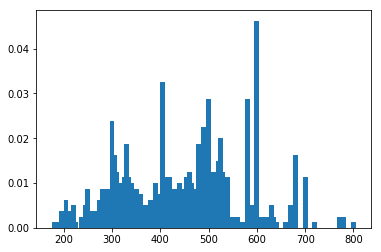

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(power_val, pr_var, width = 10)
print("The expected value of the power is:", expected_value(power_val, pr_var))

Now it is time to design a new probability mass function to calibrate the power

In [35]:
#since the sum of all values of a pmf is 1 and assuming there is a linear decrease in the probaility of power:
b = 0.01
a = (1-(len(power_val)*b))/sum(power_val)
target_pr = [(a*xi + b) for xi in power_val]

In [36]:
#to show that this can be a pmf:
sum(target_pr)

1.0000000000000002

The expected value of the calibrated power is: 373.18274259067846


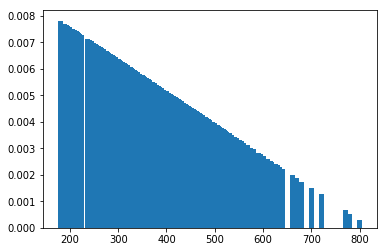

In [37]:
plt.bar(power_val, target_pr, width = 10)
print("The expected value of the calibrated power is:", expected_value(power_val, target_pr))

In [38]:
#a function that gives you the probabilty of finding the Pokemon with its number in pokedex
def is_probability(pokedex_num, _full_pokedex):
    _total_attr_list = [val_full_pk['Total'] for key_full_pk, val_full_pk in _full_pokedex.items()]
    
    #corresponding values and theie frequency 
    _power_hist_dict = count_elements(_total_attr_list)
    #pmf of the power variable 
    _power_pmf_dict = {power:frq/len(_total_attr_list) for power, frq in _power_hist_dict.items()}
    
    _power_val = [k for k, v in _power_pmf_dict.items()]
    
    _b = 0.01
    _a = (1-(len(_power_val)*b))/sum(_power_val)
    _target_pr = [(_a*xi + _b) for xi in _power_val]
    _power_val.sort()
    _target_pr.sort(reverse=True)
    target_dict = {_power_val[ind]:_target_pr[ind] for ind in range(0, len(_target_pr))}
    pr_dict = {}
    for num, attr in _full_pokedex.items():
        for power, pr in target_dict.items():
            if power == attr['Total']:
                pr_dict[num-1] = pr
                
    
    return pr_dict[pokedex_num-1]

In [39]:
#as it was shown, pokemon number 164 was overpowered. So the probibility of finding it is the lowest
is_probability(164, full_pokedex)

0.0002891618392904336